In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as mlt
import seaborn as sns

In [2]:
x=np.random.normal(0,2,40)

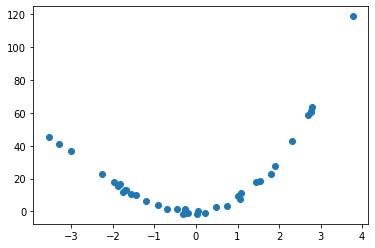

In [3]:
y=x+6*(x**2)+0.6*(x**3)+ np.random.normal(0,1,40)
mlt.scatter(x,y)

In [4]:
y=y[:,np.newaxis]
x=x[:,np.newaxis]

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
model1= LinearRegression().fit(x,y)

In [7]:
ypred=model1.predict(x)


In [8]:
model1.score(x,y)

0.19212071988297663

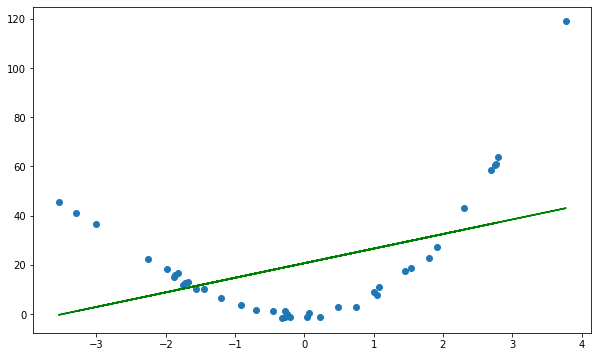

In [9]:
mlt.figure(figsize=(10,6))
mlt.scatter(x,y)
mlt.plot(x,ypred,c='g')

In [10]:
from sklearn import preprocessing as pp


In [11]:
x_poly=pp.PolynomialFeatures().fit_transform(x)

In [12]:
model2=LinearRegression().fit(x_poly,y)
ypred_d1=model2.predict(x_poly)

In [13]:
model2.score(x_poly,y)

0.9692688717646626

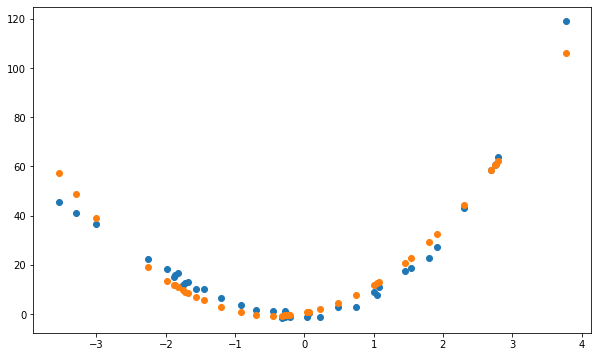

In [14]:
mlt.figure(figsize=(10,6))
mlt.scatter(x,y)
mlt.scatter(x,ypred_d1)

In [15]:
data=pd.read_csv("50_Startups.csv")

In [16]:
data.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


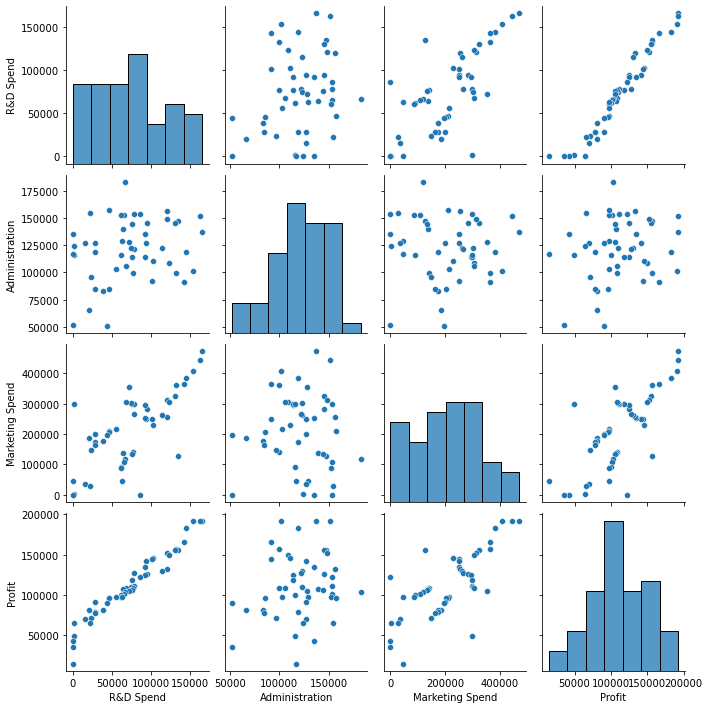

In [17]:
sns.pairplot(data,)

In [25]:
data_proc=pd.concat([data,data["State"].str.get_dummies()],axis=1)


In [26]:
x_sta=data_proc.drop(["Profit","State"],axis=1)
x_sta.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [21]:
y_sta=data["Profit"]

In [27]:
model_new=LinearRegression().fit(x_sta,y_sta)

In [32]:
model_new.score(x_sta,y_sta)

0.9507524843355148

In [33]:
rnd = pd.DataFrame(pp.PolynomialFeatures(3).fit_transform(data_proc[['R&D Spend']]),columns=['rnd0','rnd1','rnd2','rnd3'])

In [34]:
ms = pd.DataFrame(pp.PolynomialFeatures(3).fit_transform(data_proc[['Marketing Spend']]),columns=['ms0','ms1','ms2','ms3'])

In [35]:
rnd


,rnd0,rnd1,rnd2,rnd3
0,1.0,165349.20,2.734036e+10,4.520706e+15
1,1.0,162597.70,2.643801e+10,4.298760e+15
2,1.0,153441.51,2.354430e+10,3.612672e+15
3,1.0,144372.41,2.084339e+10,3.009211e+15
4,1.0,142107.34,2.019450e+10,2.869786e+15
5,1.0,131876.90,1.739152e+10,2.293539e+15
6,1.0,134615.46,1.812132e+10,2.439410e+15
7,1.0,130298.13,1.697760e+10,2.212150e+15
8,1.0,120542.52,1.453050e+10,1.751543e+15
9,1.0,123334.88,1.521149e+10,1.876108e+15


In [36]:
data_new1=pd.concat([rnd,ms,data_proc],axis=1).drop(["R&D Spend",'Marketing Spend'],axis=1)

In [40]:
x_new1=data_new1.drop(['Profit','State'],axis=1)

In [41]:
y_new1=data_new1["Profit"]

In [42]:
model12=LinearRegression().fit(x_new1,y_new1)

In [43]:
model12.score(x_new1,y_new1)

0.9619360951580704

In [44]:
model12.predict(x_new1)

array([188633.46897008, 194835.62354157, 186612.2163069 , 174556.30611111,
       174110.92398759, 158414.63322054, 157975.44608784, 160021.6649505 ,
       148667.77287387, 152523.44394342, 130664.63605145, 131171.16715099,
       126244.22345342, 125134.93836891, 147679.01011291, 142752.87974485,
       118037.99432177, 127517.26543273, 126072.33818655, 120348.74399099,
       117544.24332959, 118165.01943379, 116184.24834343, 113021.0807508 ,
       109593.24971261, 102582.01433293, 107820.97068421, 111335.01432265,
       101852.9722893 , 101607.19546904,  99876.32009694,  98976.03284137,
       102150.4800104 , 103456.65620212,  96712.96071344,  96869.68003452,
        81216.99308093,  95212.84857015,  71119.98476752,  88850.27683639,
        79220.95400307,  78097.24529878,  72142.00989949,  61982.43078316,
        71077.1179599 ,  43567.54117091,  46792.91132559,  41921.25833211,
        43921.96179974,  35785.59079714])

In [47]:
pd.to_pickle(model12,"startup profit.pkl")